In [61]:
!pip install statsforecast

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA,MSTL

In [63]:
data=pd.read_csv("/kaggle/input/analytics-vidhya-jobathon/train_IxoE5JN.csv")

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [65]:
data.head()

row_id             datetime       energy
0       1  2008-03-01 00:00:00  1259.985563
1       2  2008-03-01 01:00:00  1095.541500
2       3  2008-03-01 02:00:00  1056.247500
3       4  2008-03-01 03:00:00  1034.742000
4       5  2008-03-01 04:00:00  1026.334500

In [66]:
data.datetime=pd.to_datetime(data.datetime,yearfirst=True)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   energy    93092 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB


In [68]:
data.head()

row_id            datetime       energy
0       1 2008-03-01 00:00:00  1259.985563
1       2 2008-03-01 01:00:00  1095.541500
2       3 2008-03-01 02:00:00  1056.247500
3       4 2008-03-01 03:00:00  1034.742000
4       5 2008-03-01 04:00:00  1026.334500

In [69]:
data["unique_id"]='energy_demand'

In [70]:
data.head()

row_id            datetime       energy      unique_id
0       1 2008-03-01 00:00:00  1259.985563  energy_demand
1       2 2008-03-01 01:00:00  1095.541500  energy_demand
2       3 2008-03-01 02:00:00  1056.247500  energy_demand
3       4 2008-03-01 03:00:00  1034.742000  energy_demand
4       5 2008-03-01 04:00:00  1026.334500  energy_demand

In [71]:
train_data=data.set_index('datetime')[:"2017-12-31"].reset_index().drop("row_id", axis=1)
test_data=data.set_index('datetime')["2018-1-1":].reset_index().drop("row_id", axis=1)

In [72]:
train_data.isna().sum()

datetime        0
energy       1726
unique_id       0
dtype: int64

In [73]:
test_data.isna().sum()

datetime       0
energy       174
unique_id      0
dtype: int64

In [74]:
train_data.energy.fillna(method='bfill',inplace=True)
test_data.energy.fillna(method='bfill',inplace=True)

<AxesSubplot:xlabel='datetime', ylabel='energy'>

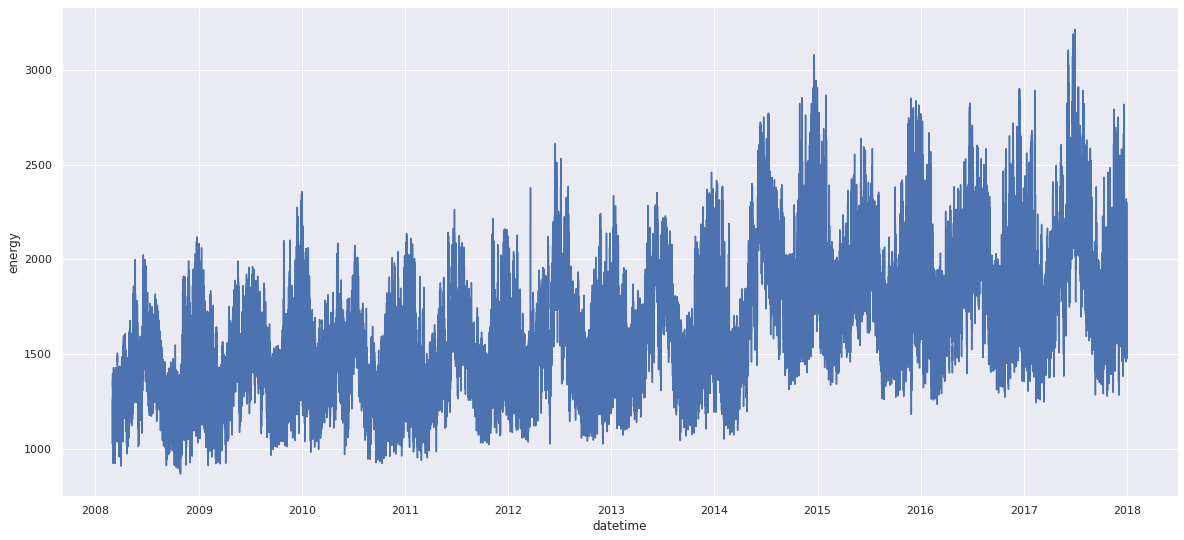

In [75]:
plt.figure(figsize=(20,9))
sns.lineplot(x=train_data.datetime, y=train_data.energy)

<AxesSubplot:xlabel='datetime', ylabel='energy'>

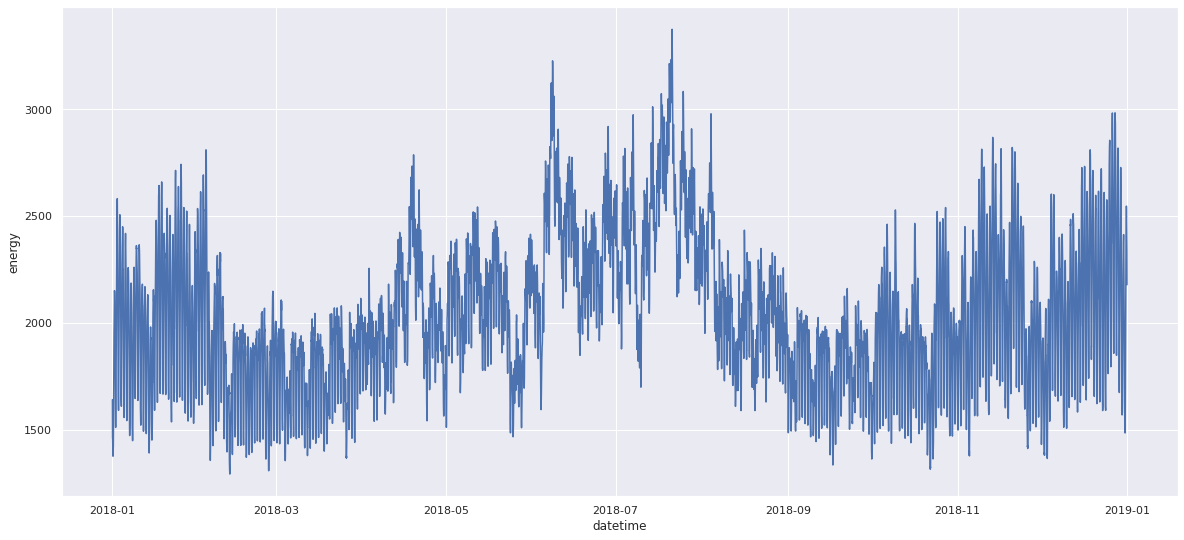

In [76]:
plt.figure(figsize=(20,9))
sns.lineplot(x=test_data.datetime, y=test_data.energy)

In [77]:
train_data.rename(columns={'datetime':'ds', 'energy':'y'}, inplace=True)
test_data.rename(columns={'datetime':'ds', 'energy':'y'}, inplace=True)

In [78]:
StatsForecast.plot(train_data)

In [79]:
StatsForecast.plot(test_data)

In [80]:
models=[MSTL(season_length=[24,24*7,24*7*365],trend_forecaster=AutoARIMA())]
sf = StatsForecast( 
    models=models,
    freq='H')

In [81]:
sf.fit(train_data)

StatsForecast(models=[MSTL])

In [82]:
sf.fitted_[0, 0].model_

data        trend  seasonal24  seasonal168  seasonal61320  \
0      1259.985596  1339.868151  -59.135816    50.964072     -71.710811   
1      1095.541504  1339.875684 -142.097720    20.833780    -123.070241   
2      1056.247559  1339.883218 -184.629374    15.727022    -114.733308   
3      1034.741943  1339.890751 -204.660332    16.393589    -116.882065   
4      1026.334473  1339.898285 -211.047904    15.509323    -118.025232   
...            ...          ...         ...          ...            ...   
86227  1942.416016  1989.454430  244.755996  -150.415832    -141.378579   
86228  1894.776855  1989.461964  189.802571  -145.065491    -139.422188   
86229  1868.062012  1989.469497  156.693640  -130.041190    -148.059935   
86230  1857.928833  1989.477031  130.724028  -120.092277    -142.179949   
86231  1764.229614  1989.484564   37.347908  -106.746128    -155.856730   

          remainder  
0      3.410605e-12  
1      3.001333e-11  
2      6.139089e-12  
3      2.819434e-11  
4      1.705303e-11  
...             ...  
86227  4.320100e-12  
86228 -1.136868e-12  
86229 -1.364242e-12  
86230 -1.364242e-11  
86231  7.730705e-12  

[86232 rows x 6 columns]

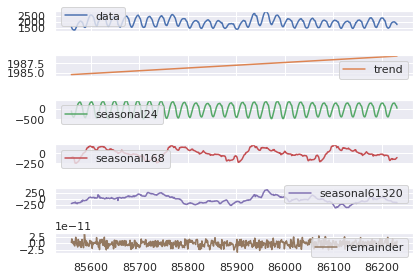

In [83]:
sf.fitted_[0, 0].model_.tail(24 * 28).plot(subplots=True, grid=True)
plt.tight_layout()
plt.show()

In [84]:
forecast_df=sf.forecast(h=8760, level=[90])

In [85]:
forecast_df.tail()

ds         MSTL   MSTL-lo-90   MSTL-hi-90
unique_id                                                               
energy_demand 2018-12-31 19:00:00  2230.080811  2195.568604  2264.592773
energy_demand 2018-12-31 20:00:00  2201.864746  2167.350586  2236.378906
energy_demand 2018-12-31 21:00:00  2172.299561  2137.783447  2206.815674
energy_demand 2018-12-31 22:00:00  2138.499756  2103.981445  2173.017822
energy_demand 2018-12-31 23:00:00  2081.132812  2046.612793  2115.653076

In [86]:
StatsForecast.plot(forecast_df)

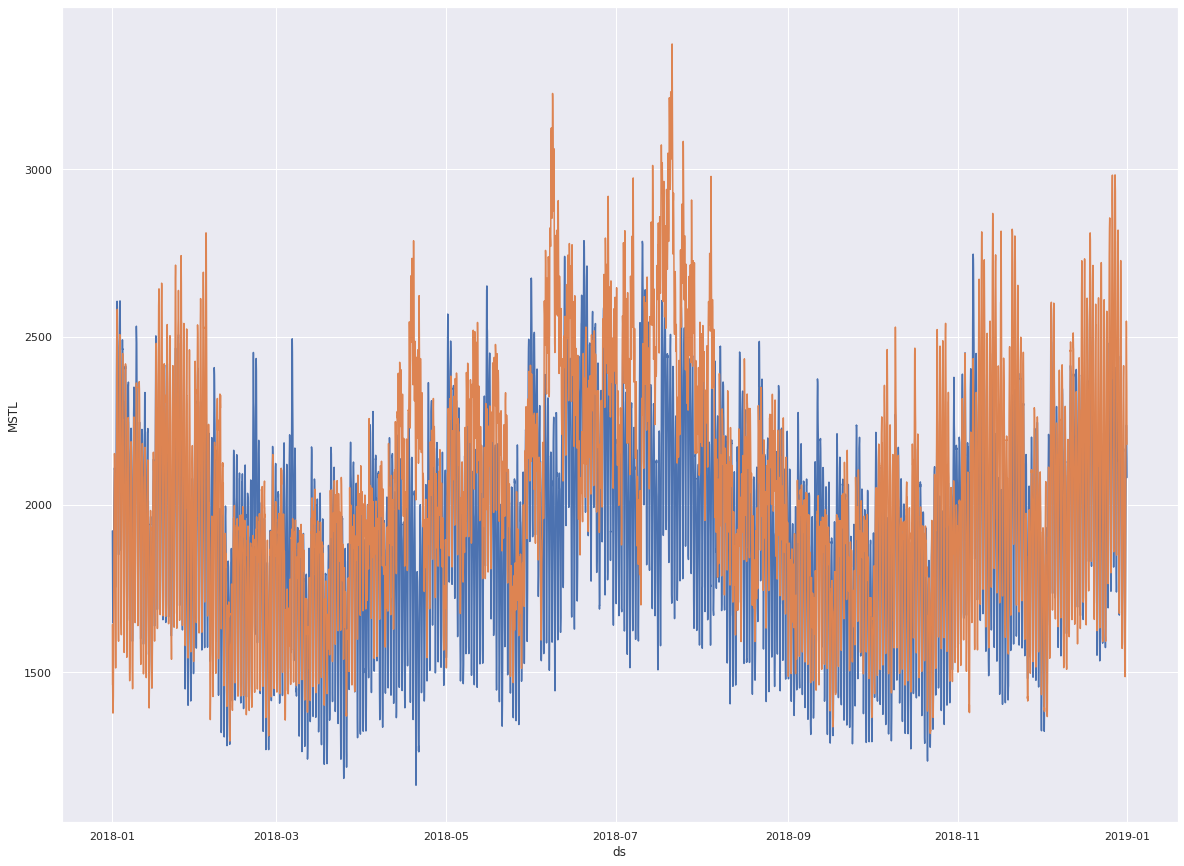

In [87]:
plt.figure(figsize=(20,15))
sns.lineplot(x='ds',y='MSTL', data=forecast_df.reset_index())
sns.lineplot(x=test_data.ds, y=test_data.y)
plt.show()

In [91]:
from sklearn.metrics import mean_absolute_error ,mean_absolute_percentage_error

In [89]:
predicted=forecast_df['MSTL'].reset_index().drop('unique_id',axis=1)

In [92]:
print("test mae", mean_absolute_error(test_data.y,predicted.MSTL))
print("test mape",mean_absolute_percentage_error(test_data.y,predicted.MSTL))

test mae 218.42389199752367
test mape 0.10190391772357323
